# Census Income

## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
    
    1. A single cell estimate of the population 16+ for each state.
    
    2. Controls for Hispanic Origin by age and sex.
    
    3. Controls by Race, age and sex.
    
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [39]:
# Importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [40]:
# Importing the dataset

census = pd.read_csv('census_income.csv',skipinitialspace = True)
census.head(3)

Age         Workclass  Fnlwgt  Education  Education_num  \
0   50  Self-emp-not-inc   83311  Bachelors             13   
1   38           Private  215646    HS-grad              9   
2   53           Private  234721       11th              7   

       Marital_status         Occupation   Relationship   Race   Sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White  Male   
1            Divorced  Handlers-cleaners  Not-in-family  White  Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black  Male   

   Capital_gain  Capital_loss  Hours_per_week Native_country Income  
0             0             0              13  United-States  <=50K  
1             0             0              40  United-States  <=50K  
2             0             0              40  United-States  <=50K

# Exploratory Data Analysis (EDA)

## Data Preprocessing

In [41]:
# Checking the dimension of the dataset

census.shape

(32560, 15)

In [42]:
# Checking the columns present in the dataset

census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [43]:
# Checking the summary information of the dataset

census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
# Checking any null values present in the dataset

census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [45]:
# Checking the unique values present in the dataset

census.nunique().sort_values(ascending=False)

Fnlwgt            21647
Capital_gain        119
Hours_per_week       94
Capital_loss         92
Age                  73
Native_country       42
Education            16
Education_num        16
Occupation           15
Workclass             9
Marital_status        7
Relationship          6
Race                  5
Sex                   2
Income                2
dtype: int64

In [46]:
# Checking the count of values present in the feature 'Age'

census['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [47]:
# Checking the count of values present in the feature 'Workclass'

census['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [48]:
# Checking the count of values present in the feature 'Fnlwgt'

census['Fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [49]:
# Checking the count of values present in the feature 'Education'

census['Education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [50]:
# Checking the count of values present in the feature 'Education_num'

census['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [51]:
# Checking the count of values present in the feature 'Marital_status'

census['Marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [52]:
# Checking the count of values present in the feature 'Occupation'

census['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [53]:
# Checking the count of values present in the feature 'Relationship'

census['Relationship'].value_counts()

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

In [54]:
# Checking the count of values present in the feature 'Race'

census['Race'].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [55]:
# Checking the count of values present in the feature 'Sex'

census['Sex'].value_counts()

Male      21789
Female    10771
Name: Sex, dtype: int64

In [56]:
# Checking the count of values present in the feature 'Capital_gain'

census['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [57]:
# Checking the count of values present in the feature 'Capital_loss'

census['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [58]:
# Checking the count of values present in the feature 'Hours_per_week'

census['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

In [59]:
# Checking the count of values present in the feature 'Native_country'

census['Native_country'].value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [60]:
# Checking the count of values present in the target feature 'Income'

census['Income'].value_counts()

<=50K    24719
>50K      7841
Name: Income, dtype: int64

In [61]:
# Splitting the dataset by 'Categorical' and 'Numerical' based on data types

census_cat=[]

for i in census.columns:
    if (census.dtypes[i] == 'object'):
        census_cat.append(i)
        
census_num=[]

for i in census.columns:
    if  (census.dtypes[i]!='object'):
        census_num.append(i)
        
print('Categorical Columns:',census_cat)
print('Numerical Columns:',census_num)

Categorical Columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numerical Columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


### Observations

Imported required libraries for processing the dataset

Dataset contains 32560 rows and 15 columns

Data types present in the datasets are int64 – 6 and object – 9

No null values present in the dataset

Splitted the dataset into categorical and numerical based on the data types

Null values are not present in the dataset, but when we analyze each feature by checking the count of values,we can find

'Workclass' contains ?(unknown) value of 1836

'Occupation' contains ?(unknown) value of – 1843

'Capital_gain' contains 0 value of - 29849

'Capital_loss ' contains 0 value of - 31041

Above feature will be modified or dropped after data visualization analysis

'Income' is the target variable and the value counts present are <=50K 24719 and >50K 7841, target variable is imbalanced

24719 people are earning less than 50k a year and 7841 people are earning more than 50k a year

Need to apply Classification algorithm to build and predict the Model

# Data Visualization

## Univariate Analysis

<AxesSubplot:>

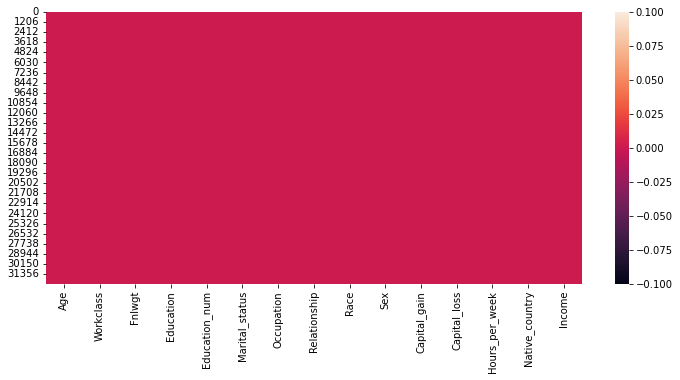

In [62]:
# Visualizing the null values in heatmap

plt.figure(figsize=(12,5))
sns.heatmap(census.isnull())

### Observations:

Visualizing null values with heatmap, above heatmap shows there are no null values present in the dataset

In [63]:
# Visualizing categorical columns with countplot

plt.figure(figsize=(15,55))
plot_number=1
for i in census_cat:
    if plot_number <=9:
        ax=plt.subplot(9,1,plot_number)
        sns.countplot(census[i],palette='viridis')
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=90,fontsize=10)
        plt.ylabel('Count',fontsize=15)
    plot_number+=1
    for j in ax.containers:
        ax.bar_label(j,fontsize=12)
plt.tight_layout()

### Observations:

Based on count plot we can observe below points

In workclass, people who are employed in private sectors are the highest compared with other sectors and 1836 people workclass sector is unknown

If we categorize by Education, people with HS-grad has the maximum count followed by some college and bachelors

If we divide people based on their martial status, married-civ-spouse is maximum followed by never married and divorced

By occupation of the people, prof-speciality tops the chart following craft repair,  Exec managerial,
Adm-clerical, sales and other service, lowest count is in Armed forces

Based on relationship, husband count is maximum with 13193 and Not in family with 8304 

If we categorize by race, ‘White’ has the maximum count of 27815 and ‘Black’ with 3124 in second with huge margin

By sex male count is higher than female

When we look into people native_country, we can see 29169 people has their native as United States


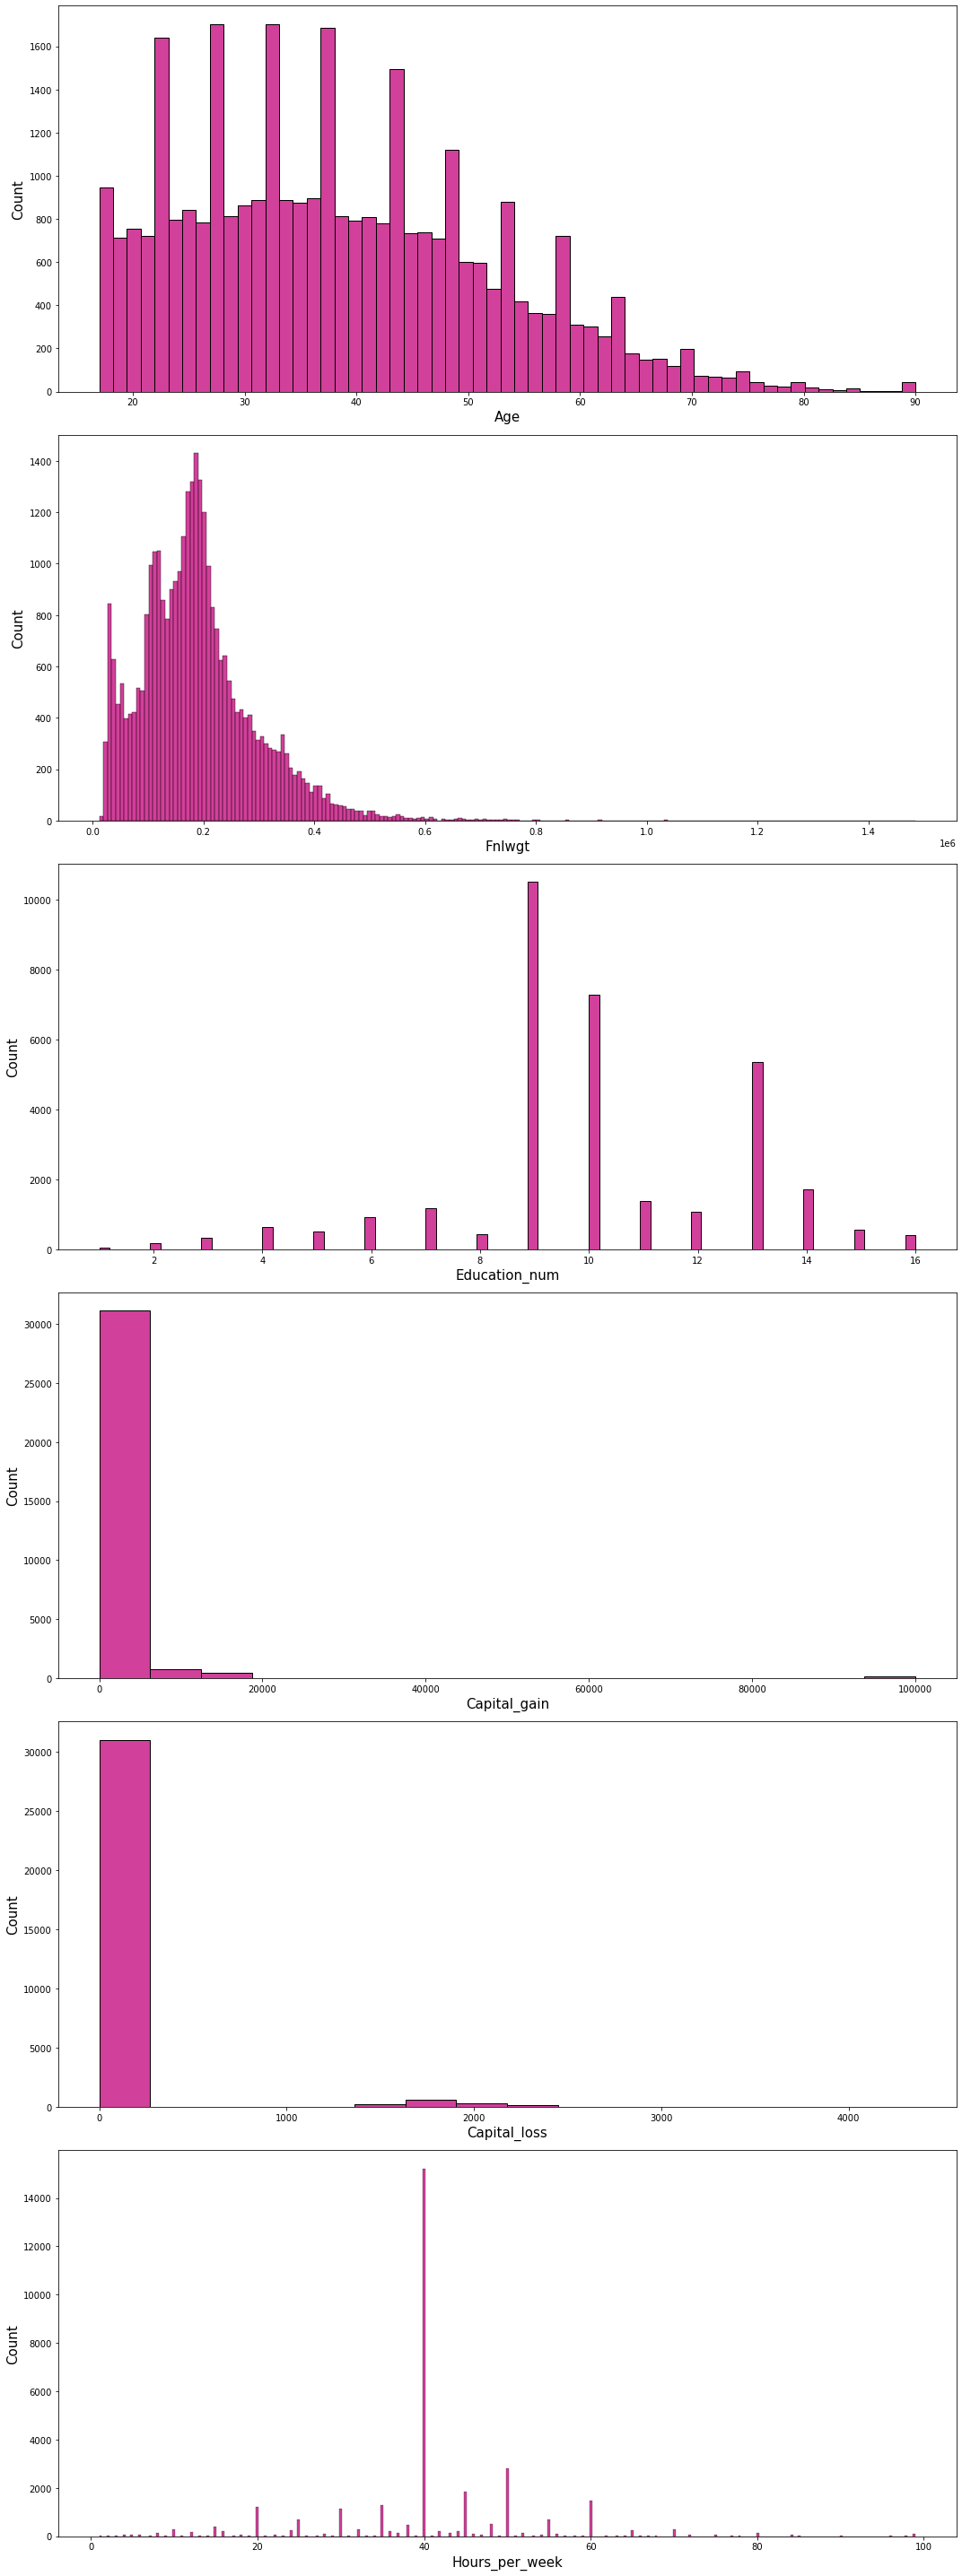

In [64]:
# Visualizing numerical columns with histplot

plt.figure(figsize=(15,40))
plot_number=1
for i in census_num:
    if plot_number <=6:
        ax=plt.subplot(6,1,plot_number)
        sns.histplot(census,x=census[i],color='#c20078')
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=10)
        plt.ylabel('Count',fontsize=15)
    plot_number+=1
plt.tight_layout()

### Observations:

People from age group 17 to 90 are present in the dataset, with age group from 17 to 50 are maximum

If we look into education_num, maximum people are in 9 which denotes HS-grad followed by some college and bachelors

Almost 90% of the people are with 0 capital gain and capital loss 

People who work for 40 hours per week is maximum, followed by 50 and 45 hours 

## Bivariate and Multivariate Analysis

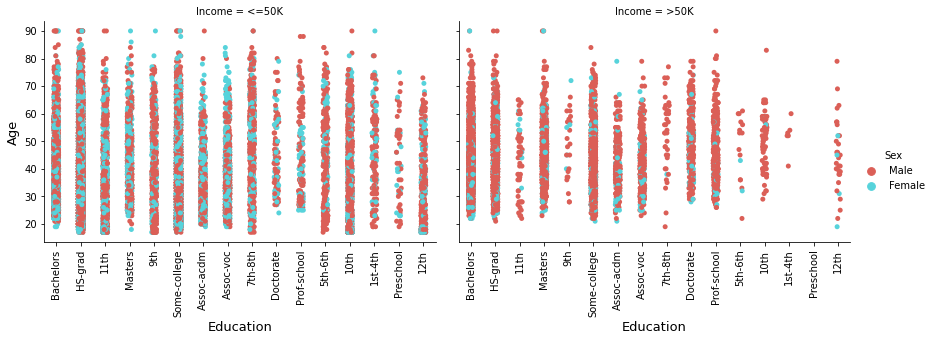

In [65]:
# Visualizing Education Vs Age Vs Income Vs Sex using catplot

fx=sns.catplot(data=census, x="Education", y="Age", col="Income",kind="strip",hue='Sex',palette='hls',height=4, aspect=1.5)
fx.set_xticklabels(rotation=90,fontsize=10)
fx.set_xlabels(fontsize=13)
fx.set_ylabels(fontsize=13)
plt.show()

### Observations

Based on above catplot with strip, we can observe Education Vs Age Vs Income Vs Sex

Female population is maximum in the category of income below 50k, compared with female getting income of above 50k

Male population is higher when compared with female

People with HS-grad, Bachelors and some_colleges are maximum in both the income category

People in the age group from mid 20's to 60's are are maximum in earning above 50k in almost from every education 
background

People with education of preschool, 1st-4th, 5th-6th, 9th, 7th-8th, 11th and 12th count are less in the category of income
above 50k

In [66]:
# Visualizing Workclass Vs Age Vs Income Vs Sex using catplot

fx=sns.catplot(data=census, x="Workclass", y="Age", col="Income",kind="strip",hue='Sex',palette='magma',height=5,
               aspect=1.5)
fx.set_xticklabels(rotation=90,fontsize=12)
fx.set_xlabels(fontsize=14)
fx.set_ylabels(fontsize=14)
plt.show()


### Observations:
    
Employment status of an individual is maximum in self-employed-not-inc(Unincorporated self employment),self-employed-inc(Incorporated self employment) and
private sector in the category of income above 50k

Male count is higher than female in the category of income above 50k

Female count is higher than male in the category of income below 50k in private, state-gov,federal-gov,local-gov and ?(unknown)

?(unknown) count is found in both the category of income above and below 50k

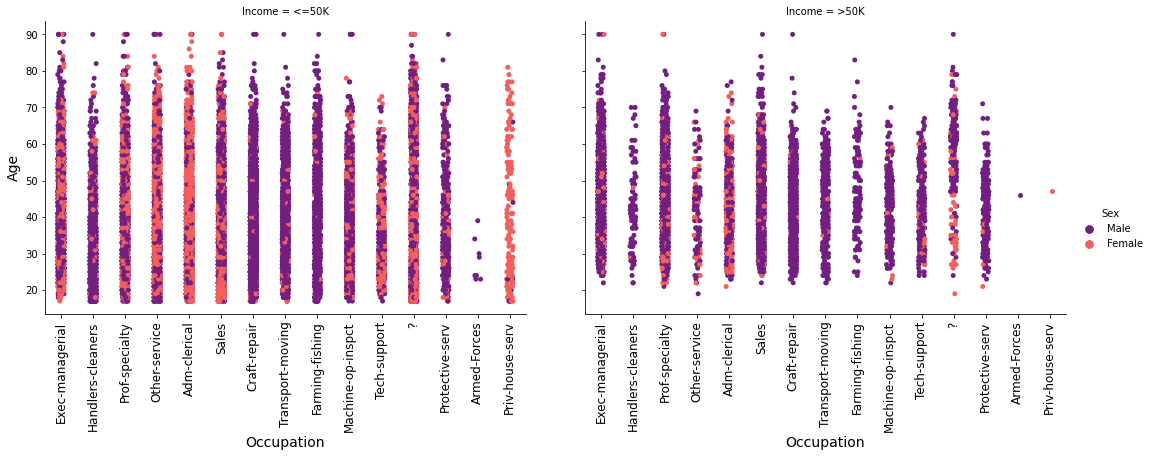

In [67]:
# Visualizing Occupation Vs Age Vs Income Vs Sex using catplot

fx=sns.catplot(data=census, x="Occupation", y="Age", col="Income",kind="strip",hue='Sex',palette='magma',height=5,
               aspect=1.5)
fx.set_xticklabels(rotation=90,fontsize=12)
fx.set_xlabels(fontsize=14)
fx.set_ylabels(fontsize=14)
plt.show()

### Observations

People in the occupation of Exec-Managerial, Prof-speciality and Sales have the maximum count of population earning income 
above 50k

We can observe Male count is most in the occupation of Transport moving, Farming -Fishing, Craft-repair in both income 
above and below 50k

In the occupation of Sales, Machine-op-inspct, Tech support and Protective-serv Male are earning more than
Female in the category of income above 50k

In income of above 50k, Female are earning more than Male in Adm-clerical occupation

?(unknown) count is found in both the category of income above and below 50k

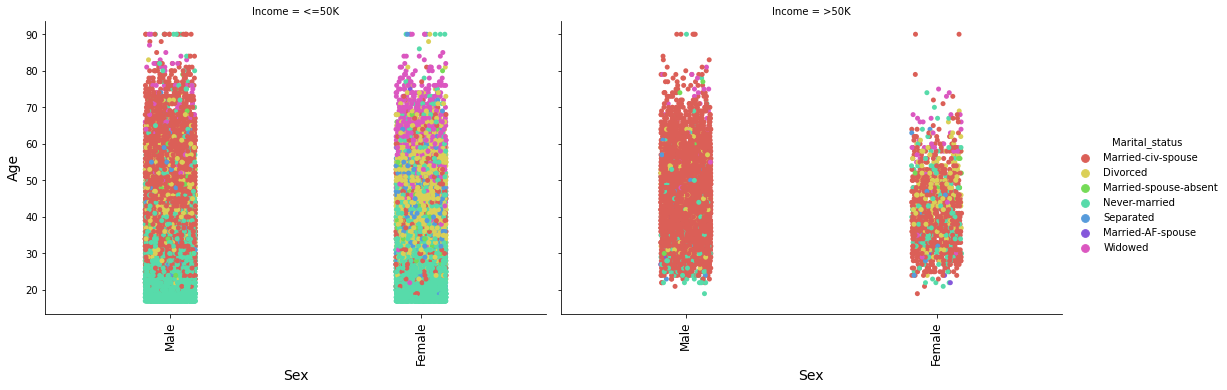

In [68]:
# Visualizing Marital_status Vs Age Vs Income Vs Sex using catplot

fx=sns.catplot(data=census, x='Sex', y="Age", col="Income",kind="strip",hue='Marital_status',palette='hls',height=5,
               aspect=1.5)
fx.set_xticklabels(rotation=90,fontsize=12)
fx.set_xlabels(fontsize=14)
fx.set_ylabels(fontsize=14)
plt.show()

### Observations:

Married-civ-spouse count is maximum in the category of income above 50k, followed by never_married and Divorced

Married-AF-spouse count is very less in both the category of income above and below 50k

Female count is maximum in Divorced, Married-spouse-absent, Never-married, Separated and Widowed in the category of income
below 50k

Most of the Divorced are in the age group above 50's

People in the age group from mid 20's to 60's are maximum in earning above 50k in almost from every category of 
martial status

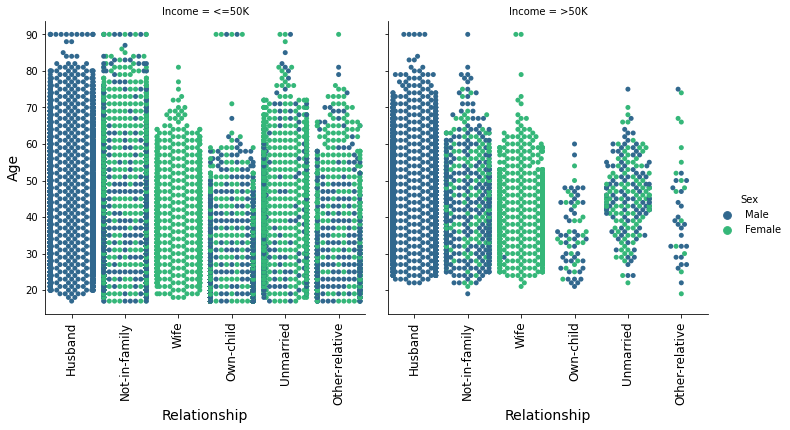

In [32]:
# Visualizing Relationship Vs Age Vs Income Vs Sex using catplot

fx=sns.catplot(data=census, x="Relationship", y="Age", col="Income",kind="swarm",hue='Sex',palette='viridis')
fx.set_xticklabels(rotation=90,fontsize=12)
fx.set_xlabels(fontsize=14)
fx.set_ylabels(fontsize=14)
plt.show()

### Observation:
    
Husband in the age group from mid 20's to 80's are maximum in the category of income above 50k

Not-in-family, Wife and Unmarried, own-child and Other-relative count is maximum between mid 20's to 60's in income above 
50 k

Female who are Not-in-family and Unmarried count is high who earn income below 50k

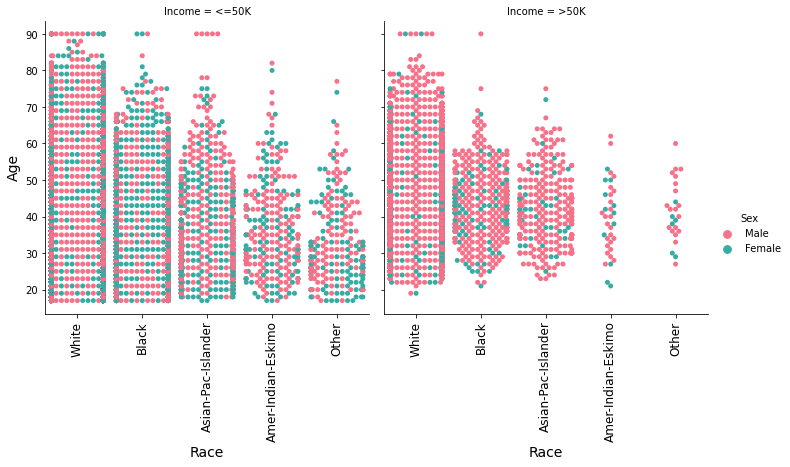

In [34]:
# Visualizing Race Vs Age Vs Income Vs Sex using catplot

fx=sns.catplot(data=census, x="Race", y="Age", col="Income",kind="swarm",hue='Sex',palette='husl')
fx.set_xticklabels(rotation=90,fontsize=12)
fx.set_xlabels(fontsize=14)
fx.set_ylabels(fontsize=14)
plt.show()

### Observations

White people count is most in income above 50k followed by Black and Asian-Pac-Islander

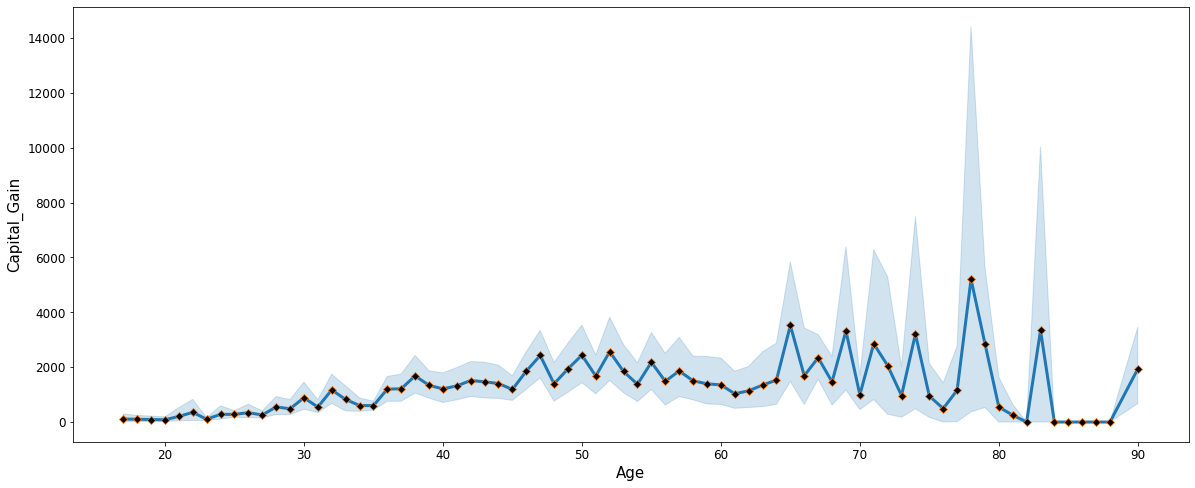

In [69]:
# Comparing Age vs Capital_Gain by lineplot

plt.figure(figsize=(20,8))
sns.lineplot(data =census,x='Age',y='Capital_gain',palette="viridis",
            linestyle = 'solid',linewidth=3,marker="D",markersize=5,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Age',fontsize=15)
plt.ylabel('Capital_Gain',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations

When we compare Age Vs Capital_Gain, we can observe people in the age group from mid 60's to 80's have the maximum
Capital Gain compared with other age groups

Specifically people in the age of 78, 83, 65, 69, 71, 74 and 79 has the highest Capital_Gain

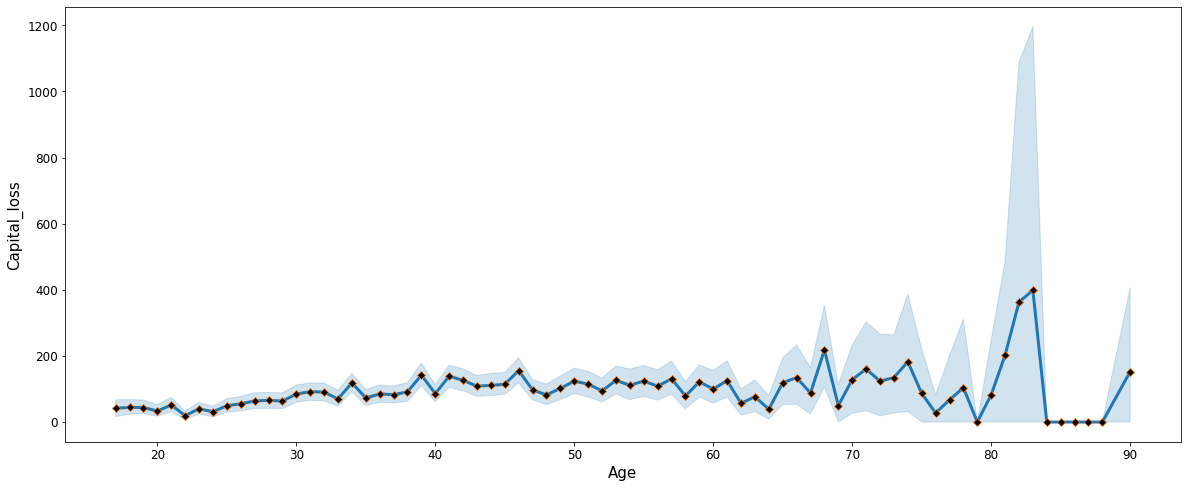

In [70]:
# Comparing Age vs Capital_loss by lineplot

plt.figure(figsize=(20,8))
sns.lineplot(data =census,x='Age',y='Capital_loss',palette="viridis",
            linestyle = 'solid',linewidth=3,marker="D",markersize=5,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Age',fontsize=15)
plt.ylabel('Capital_loss',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations

When we compare Age Vs Capital_Loss, people in the age group from mid 60's to 80's have the maximum loss followed by
people from mid 30's to 60's  

Specifically people in the age of 83 and 82 has the highest Capital_loss

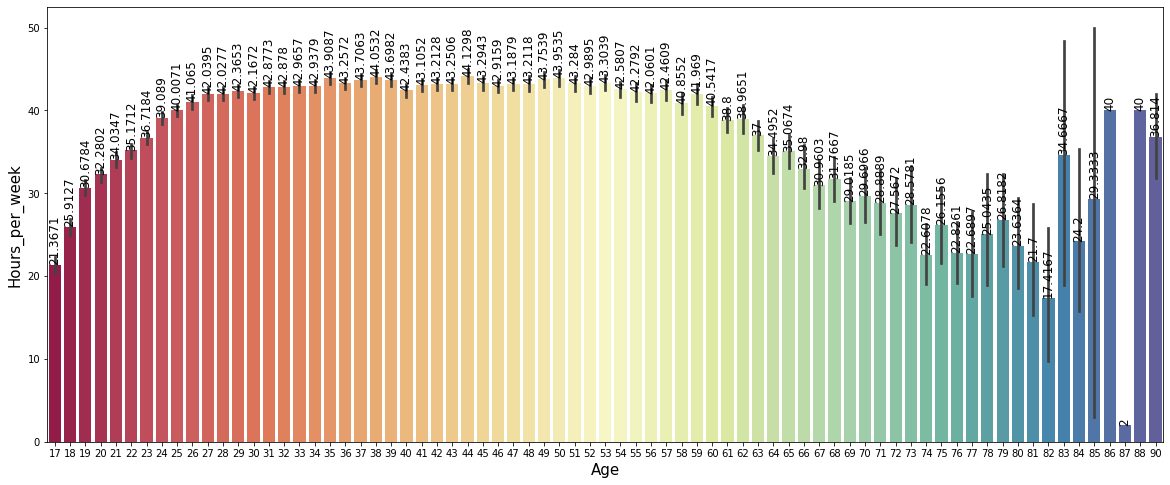

In [71]:
# Comparing Age vs Hours_per_week by barplot

plt.figure(figsize=(20,8))
ex = sns.barplot(data =census,x='Age',y='Hours_per_week',palette="Spectral")
plt.xlabel('Age',fontsize=15)
plt.ylabel('Hours_per_week',fontsize=15)
for i in ex.containers:
    ex.bar_label(i,fontsize=12,rotation = 90)
plt.show()

### Observations

People from age group from 25 to 60 works 40 hours per week, even in the age 86 and 88 people works for 40 hours a week

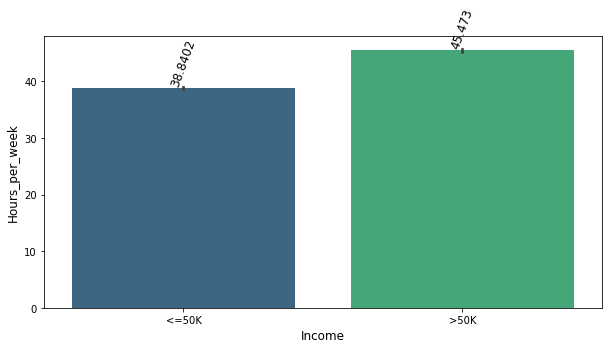

In [72]:
# Comparing Income vs Hours_per_week by barplot

plt.figure(figsize=(10,5))
ex = sns.barplot(data =census,x='Income',y='Hours_per_week',palette="viridis")
plt.xlabel('Income',fontsize=12)
plt.ylabel('Hours_per_week',fontsize=12)
for i in ex.containers:
    ex.bar_label(i,fontsize=12,rotation = 70)
plt.show()

### Observations

People with income above 50k works for 40+ hours a week and people who earns below 50k work for below 40hours a week

As this shows people income increases when their working hours increase

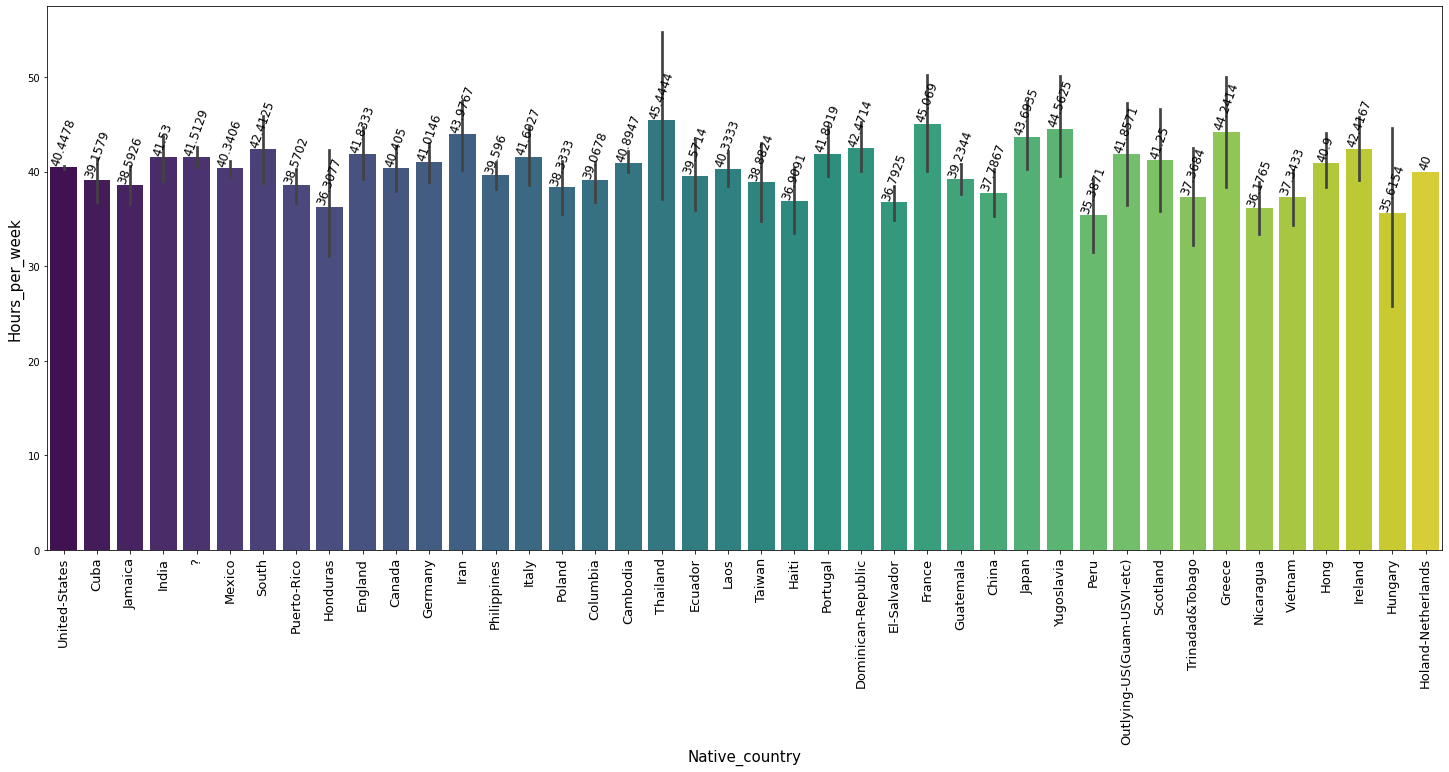

In [73]:
# Comparing Native_country vs Hours_per_week by barplot

plt.figure(figsize=(25,10))
ex = sns.barplot(data =census,x='Native_country',y='Hours_per_week',palette="viridis")
plt.xlabel('Native_country',fontsize=15)
plt.xticks(rotation=90,fontsize=13)
plt.ylabel('Hours_per_week',fontsize=15)
for i in ex.containers:
    ex.bar_label(i,fontsize=12,rotation = 70)
plt.show()

### Observations

People with native country from Thailand and France works mostly for 45 hours a week which is the maximum hours 
reported in the dataset

People with native country from Peru and Hungary works mostly for 35 hours a week which is the lowest hours 
reported in the dataset

We can also  observe ?(unknown) present in the Native_country

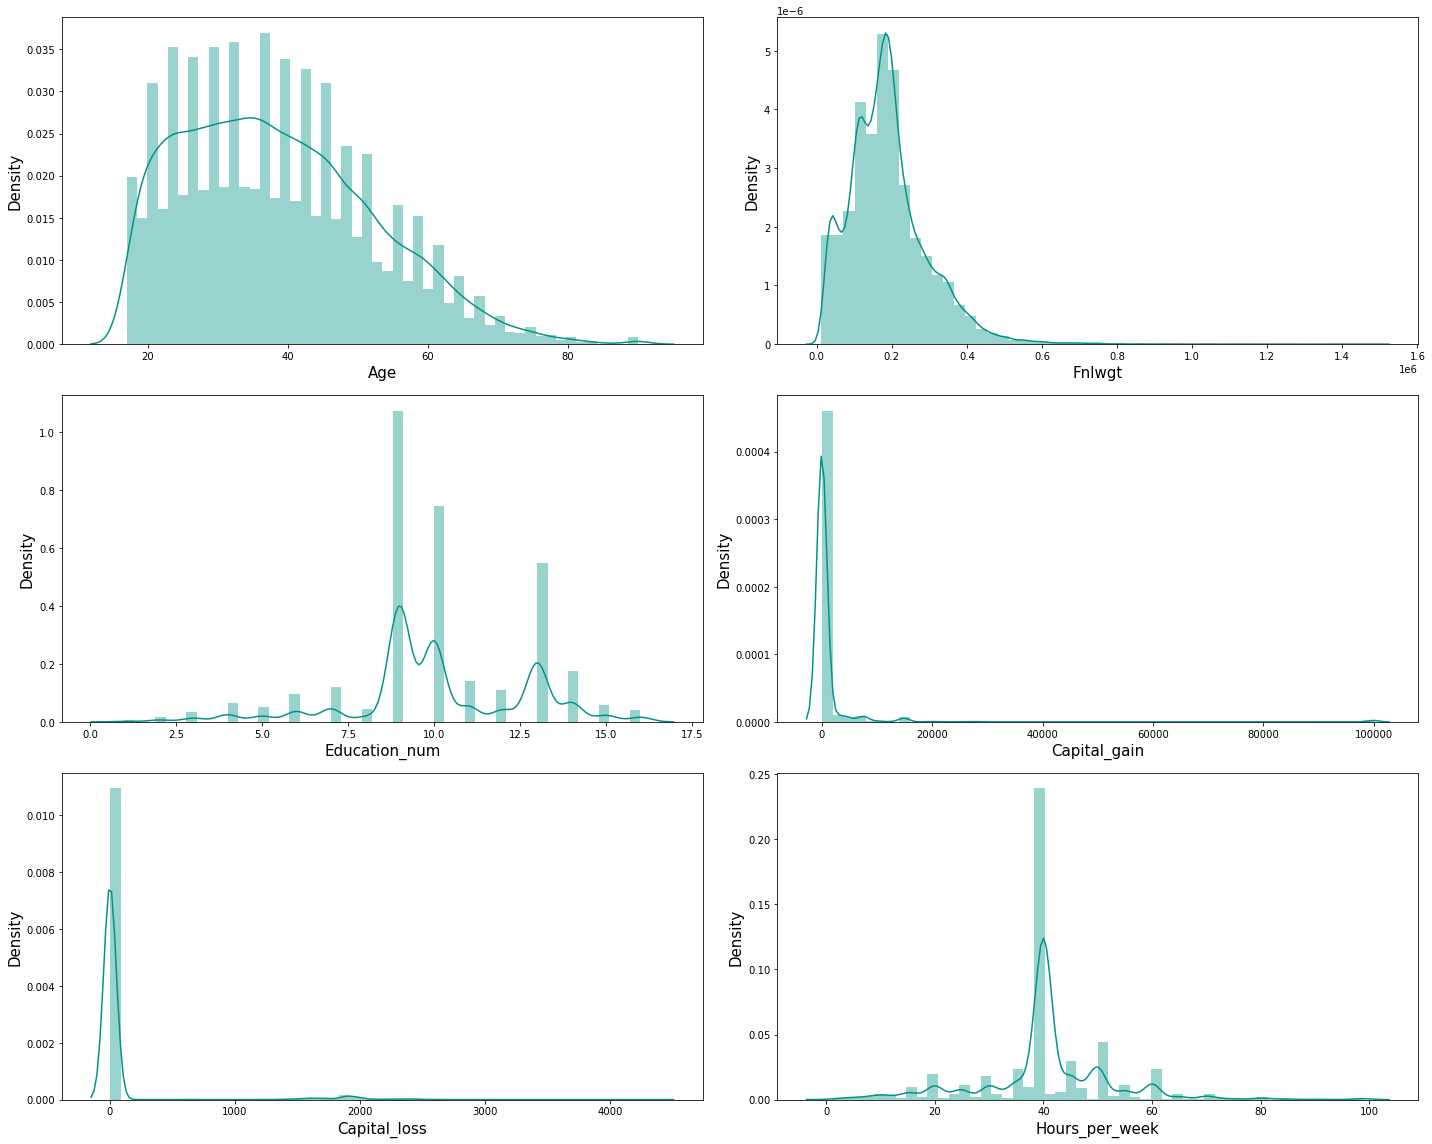

In [74]:
# Visualizing the dataset with distribution plot to check the distribution

plt.figure(figsize=(20,16))
plot_number=1
for i in census_num:
    if plot_number <=6:
        ax=plt.subplot(3,2,plot_number)
        sns.distplot(census[i],color='#029386')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Density',fontsize=15)
    plot_number+=1
plt.tight_layout()

### Observations

We can observe the distribution is one sided in the features Age,Fnlwgt,Capital_gain and Capital_loss

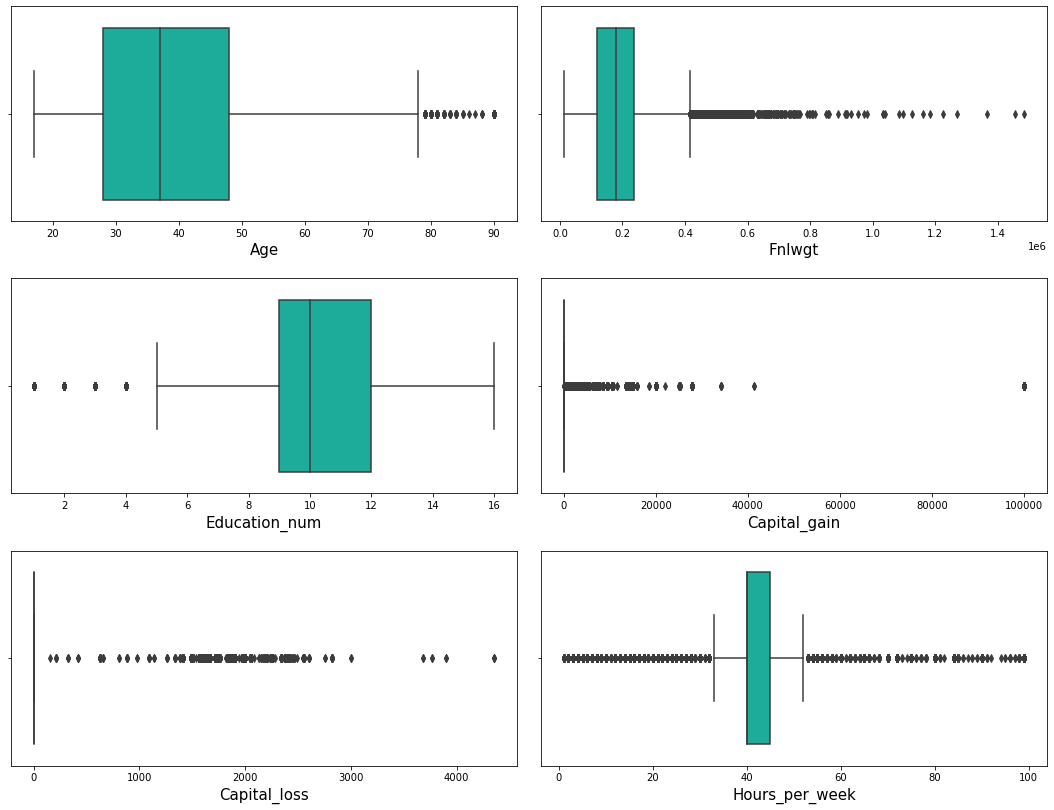

In [75]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(15,30))
st = 1
for i in census_num:
    if st <=15:
        sub = plt.subplot(8,2,st)
        sns.boxplot(census[i],color='#06c2ac')
        plt.xlabel(i,fontsize=15)
        plt.tight_layout(pad=2.0)
    st+=1
plt.show()

### Observations

Outliers are present in the features Age,Fnlwgt,Education_num,Capital_gain,Capital_loss and Hours_per_week

# Data Feature Selection and Engineering

### Replacing unknown values in features 'Workclass','Occupation' and 'Native_country'

In [76]:
# Replacing unknown values in features 'Workclass','Occupation' and 'Native_country'

census['Workclass'] =census.Workclass.str.replace('?','Private')
census['Occupation'] =census.Occupation.str.replace('?','Prof-speciality')
census['Native_country'] =census.Native_country.str.replace('?','United-States')

In [77]:
census['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [78]:
census['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Prof-speciality      1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [79]:
census['Native_country'].value_counts()

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

### Observations

We should not build model with Null,NaN or '?'(unkown) value, hence replacing the '?' value with most frequent value 
in those features

Replaced the unknown count with most frequent value in the features 'Workclass','Occupation' and 'Native_country'

In [80]:
# Dropping the feature education

census.drop(['Education'],axis=1,inplace=True)
census.shape

(32560, 14)

### Observations

Dropped feature education as we have already have a column name education_num where the education is mentioned in
numerical form.

## Label Encoding

In [81]:
# Label encoding categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in census.columns:
    if (census[i].dtypes=='object'):
        census[i]=le.fit_transform(census[i].values.reshape(-1,1))

In [82]:
census.sample(3)

Age  Workclass  Fnlwgt  Education_num  Marital_status  Occupation  \
17799   25          3  130302              9               4           5   
24322   53          3  313243             10               5           2   
22909   19          3  200790              8               2           9   

       Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
17799             4     4    1             0             0              40   
24322             1     4    1             0          2444              45   
22909             2     4    0         15024             0              40   

       Native_country  Income  
17799              38       0  
24322              38       1  
22909              38       1

### Observations

Encoded the categorical columns primary_fuel,source and geolocation_source by label Encoder

## Describe - Statistical Summary

In [83]:
census.describe().T

count           mean            std      min       25%  \
Age             32560.0      38.581634      13.640642     17.0      28.0   
Workclass       32560.0       3.094349       1.107094      0.0       3.0   
Fnlwgt          32560.0  189781.814373  105549.764924  12285.0  117831.5   
Education_num   32560.0      10.080590       2.572709      1.0       9.0   
Marital_status  32560.0       2.611794       1.506225      0.0       2.0   
Occupation      32560.0       6.475676       4.357023      0.0       3.0   
Relationship    32560.0       1.446376       1.606794      0.0       0.0   
Race            32560.0       3.665848       0.848817      0.0       4.0   
Sex             32560.0       0.669195       0.470510      0.0       0.0   
Capital_gain    32560.0    1077.615172    7385.402999      0.0       0.0   
Capital_loss    32560.0      87.306511     402.966116      0.0       0.0   
Hours_per_week  32560.0      40.437469      12.347618      1.0      40.0   
Native_country  32560.0      36.417107       6.056133      0.0      38.0   
Income          32560.0       0.240817       0.427586      0.0       0.0   

                     50%       75%        max  
Age                 37.0      48.0       90.0  
Workclass            3.0       3.0        7.0  
Fnlwgt          178363.0  237054.5  1484705.0  
Education_num       10.0      12.0       16.0  
Marital_status       2.0       4.0        6.0  
Occupation           6.0      10.0       14.0  
Relationship         1.0       3.0        5.0  
Race                 4.0       4.0        4.0  
Sex                  1.0       1.0        1.0  
Capital_gain         0.0       0.0    99999.0  
Capital_loss         0.0       0.0     4356.0  
Hours_per_week      40.0      45.0       99.0  
Native_country      38.0      38.0       40.0  
Income               0.0       0.0        1.0

### Observations

Count is same across all the columns stating no missing values

Mean is greater than median(50%) in columns 'Age','Fnlwgt','Capital_gain','Capital_loss' and 'Hours_per_week' which shows data is skewed towards right side

Also we can see the difference between 75% to max are high in columns 'Age','Workclass','Fnlwgt', 'Capital_gain','Capital_loss' and 'Hours_per_week' which indicates presence of outliers

## Correlation Analysis

<AxesSubplot:>

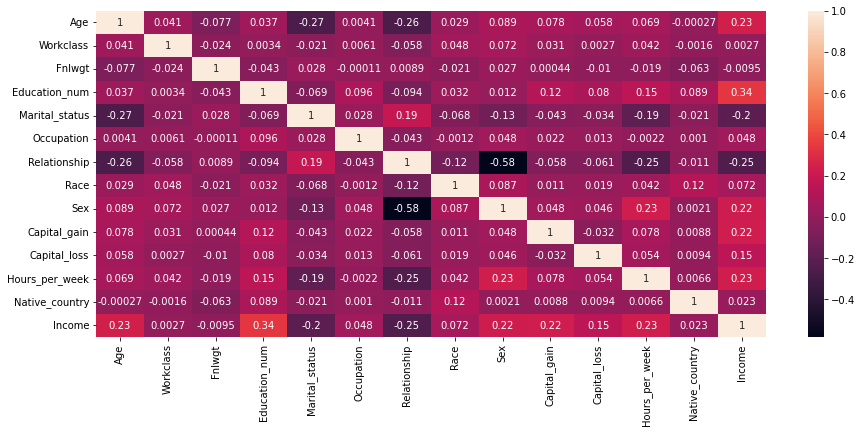

In [84]:
# Checking Correlation of the dataset with Heatmap

plt.figure(figsize=(15,6))
sns.heatmap(census.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

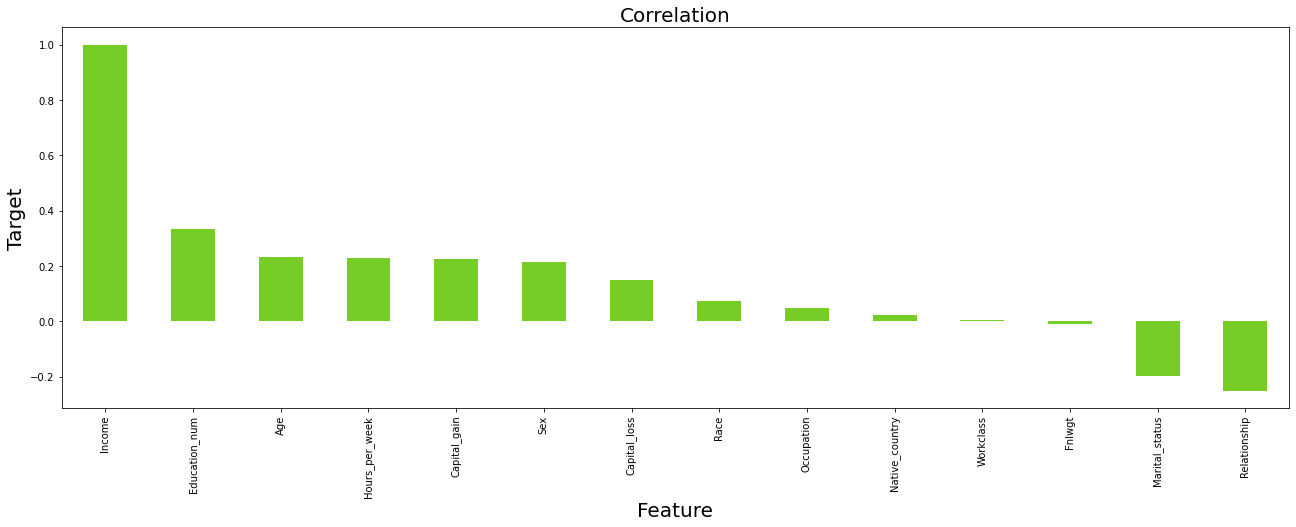

In [85]:
# Checking Correlation of the input attributes with the Target variable 'Income' by Bar Plot

plt.figure(figsize=(22,7))
census.corr()['Income'].sort_values(ascending=False).plot(kind='bar',color='#76cd26')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [86]:
census.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.002739
Native_country    0.023063
Occupation        0.048291
Race              0.071853
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

### Observations:
    
Relationship, Marital_status and Fnlwgt are highly negatively correlated with target variable Income.

Workclass, Native_country, Occupation, Race, Capital_loss, Sex, Capital_gain, Hours_per_week, Age and
Education_num are positively correlated with target variable

Moreover Relationship vs sex, Relationship vs age, martial_status vs age, Hours_per_week vs Relationship and
Hours_per_week vs martial_status are negatively correlated with each other

## Outliers Treatment with Zscore

In [87]:
# Removing outliers with zscore 

from scipy.stats import zscore

col = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
z1 = census[col]
z1.head()

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40
2   53  234721              7             0             0              40
3   28  338409             13             0             0              40
4   37  284582             14             0             0              40

In [88]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [89]:
census_new = census[(z<3).all(axis=1)]

In [90]:
census.shape

(32560, 14)

In [91]:
census_new.shape

(29827, 14)

In [92]:
# Checking the dataloss

dataloss = (32560-29827)/32560*100
dataloss

8.393734643734643

### Observations:
    
After applying z score to remove outliers, data loss is at 8.39% which is in acceptable range.

## Skewness

In [93]:
# Checking Skewness

census_new.skew()

Age                0.491112
Workclass          0.092296
Fnlwgt             0.634168
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.096629
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -4.335169
Income             1.330372
dtype: float64

In [95]:
# Applying log transformation method for numerical features

census['Capital_loss']= np.log(census['Capital_loss'])
census['Capital_gain']= np.log(census['Capital_gain'])
census['Fnlwgt']= np.log(census['Fnlwgt'])

In [96]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['Fnlwgt','Capital_gain','Capital_loss']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
census_new[skew] = pt.fit_transform(census_new[skew].values)

In [97]:
census_new.skew()

Age                0.491112
Workclass          0.092296
Fnlwgt            -0.034910
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.096629
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week    -0.354170
Native_country    -4.335169
Income             1.330372
dtype: float64

In [98]:
# Dropping feature 'Capital_loss'

census_new.drop(['Capital_loss'],axis=1,inplace=True)
census_new.shape

(29827, 13)

In [100]:
# Dropping feature 'Capital_gain'

census_new.drop(['Capital_gain'],axis=1,inplace=True)
census_new.shape

(29827, 12)

In [101]:
census_new.skew()

Age               0.491112
Workclass         0.092296
Fnlwgt           -0.034910
Education_num    -0.170298
Marital_status   -0.048971
Occupation        0.096629
Relationship      0.743825
Race             -2.436068
Sex              -0.680003
Hours_per_week   -0.354170
Native_country   -4.335169
Income            1.330372
dtype: float64

### Observations

Skewness was high in columns 'Fnlwgt','Capital_gain','Capital_loss'

Applied PowerTransformer yea-johnson method for the following numerical features 'Fnlwgt','Capital_gain','Capital_loss' and skewness got reduced in 'Fnlwgt' 

When Applying PowerTransformer 'yea-johnson' and 'box cox' method for 'Capital_gain' and 'Capital_loss' the skewness is not reduced, even applied these methods 'log', 'sqrt' and 'cbrt' still skewness not reduced.

Dropped column 'Capital_gain' and 'Capital_loss', as the value for skewness is above the threshold

Not applied PowerTransformer methods to 'categorical' columns 

## Variance Inflation Factor

In [102]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = census_new.drop("Income",axis=1)
x.sample(5)

Age  Workclass       Fnlwgt  Education_num  Marital_status  Occupation  \
21819   27          3  1475.636603              9               4          12   
2949    27          3  1297.731403             13               2          10   
6598    39          3  1338.958020             13               2          13   
16821   47          3  1197.804499             10               5           0   
7535    43          3  1075.554199              9               2           2   

       Relationship  Race  Sex  Hours_per_week  Native_country  
21819             3     2    1              60              38  
2949              0     4    1              42              38  
6598              0     4    1              40              38  
16821             4     4    0              16              10  
7535              0     4    1              40              38

In [103]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor        Features
0     9.179703             Age
1     8.419505       Workclass
2    10.943089          Fnlwgt
3    16.942264   Education_num
4     4.139272  Marital_status
5     3.190062      Occupation
6     2.727437    Relationship
7    18.133449            Race
8     4.391704             Sex
9    14.152092  Hours_per_week
10   29.305800  Native_country


In [104]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['Fnlwgt','Education_num','Hours_per_week']
st = StandardScaler()
x[m] = st.fit_transform(x[m].values)

In [105]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor        Features
0     8.662985             Age
1     8.226828       Workclass
2     1.007800          Fnlwgt
3     1.046401   Education_num
4     4.136473  Marital_status
5     3.149244      Occupation
6     2.738903    Relationship
7    16.985183            Race
8     4.250497             Sex
9     1.130829  Hours_per_week
10   24.355472  Native_country


In [106]:
# Dropping Native_country 

x.drop(['Native_country'],axis=1,inplace=True)

In [107]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

   VIF Factor        Features
0    7.557397             Age
1    7.861641       Workclass
2    1.006826          Fnlwgt
3    1.044031   Education_num
4    3.914725  Marital_status
5    3.109124      Occupation
6    2.525817    Relationship
7   12.802000            Race
8    4.067756             Sex
9    1.130587  Hours_per_week


In [108]:
x.drop(['Race'],axis=1,inplace=True)

In [109]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

   VIF Factor        Features
0    5.980500             Age
1    7.061163       Workclass
2    1.006654          Fnlwgt
3    1.043187   Education_num
4    3.693104  Marital_status
5    3.053043      Occupation
6    2.362447    Relationship
7    3.719770             Sex
8    1.129688  Hours_per_week


### Observations

VIF is high in features 'Fnlwgt','Education_num','Hours_per_week','Race' and 'Native_country'

Applied scaling method to standardize the features and dropped 'Native_country', 'Race'

Now VIF has been reduced under the threshold of 10

## Applying SMOTE Technique

In [114]:
#Splitting the features to x and y
    
x.shape

(29827, 9)

In [115]:
y = census_new['Income']
y.shape

(29827,)

<AxesSubplot:xlabel='Income', ylabel='count'>

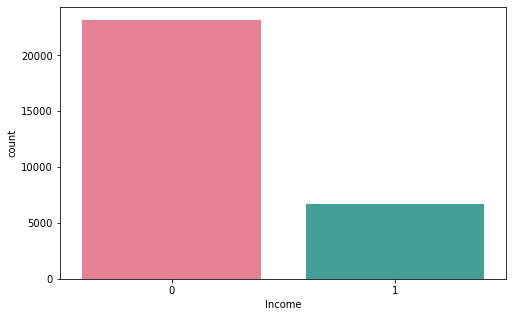

In [116]:
# Checking the count of feature 'Income' 

plt.figure(figsize=(8,5))
sns.countplot(y,palette='husl')

### Observation

Above countplot shows the classes are imbalanced, hence applying SMOTE technique to balance the classes

In [117]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [118]:
# Applying SMOTE technique 

smt = SMOTE()

x2,y2 = smt.fit_resample(x,y)

In [119]:
# Checking the count of feature 'Income' after applying 'SMOTE'

plt.figure(figsize=(10,5))
print(y2.value_counts())
sns.countplot(y2,palette='husl')

0    23173
1    23173
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

### Observations

Applied SMOTE technique to balance the Target Variable Income

Above countplot shows target variable is equal in all the category

# Model Evaluation

In [120]:
# Checking the dimension of the data 

x2.shape

(46346, 9)

In [121]:
# Checking the dimension of the data 

y2.shape

(46346,)

In [122]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding Random State

In [123]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x2_train,y2_train)
    predlr = lr.predict(x2_test)
    acc = accuracy_score(y2_test,predlr)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 75.65448791714614 on Random State 76


## Train and Split

In [124]:
# Training the Model with .30 as test size and random state at 76

x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30, random_state=76)

In [125]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## GaussianNB

In [126]:
GB = GaussianNB()
GB.fit(x2_train,y2_train)
print(GB.score(x2_train,y2_train))
GB_predict = GB.predict(x2_test)
cr1 = cross_val_score(GB,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GB_predict)*100)
print('CV score of GaussianNB:',cr1.mean()*100)
print(confusion_matrix(y2_test,GB_predict))
print(classification_report(y2_test,GB_predict))

0.7644411565254916
Accuracy Score: 76.81242807825086
CV score of GaussianNB: 76.54383572947279
[[5146 1785]
 [1439 5534]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      6931
           1       0.76      0.79      0.77      6973

    accuracy                           0.77     13904
   macro avg       0.77      0.77      0.77     13904
weighted avg       0.77      0.77      0.77     13904



## LogisticRegression

In [127]:
LR = LogisticRegression()
LR.fit(x2_train,y2_train)
print(LR.score(x2_train,y2_train))
LR_predict = LR.predict(x2_test)
cr10 = cross_val_score(LR,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,LR_predict)*100)
print('CV score of GaussianNB:',cr10.mean()*100)
print(confusion_matrix(y2_test,LR_predict))
print(classification_report(y2_test,LR_predict))

0.745114357931077
Accuracy Score: 75.65448791714614
CV score of GaussianNB: 74.79395551607864
[[5141 1790]
 [1595 5378]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6931
           1       0.75      0.77      0.76      6973

    accuracy                           0.76     13904
   macro avg       0.76      0.76      0.76     13904
weighted avg       0.76      0.76      0.76     13904



## SVC

In [233]:
SV = SVC()
SV.fit(x2_train,y2_train)
print(SV.score(x2_train,y2_train))
SV_predict = SV.predict(x2_test)
cr2 = cross_val_score(SV,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,SV_predict)*100)
print('CV score of SVC:',cr2.mean()*100)
print(confusion_matrix(y2_test,SV_predict))
print(classification_report(y2_test,SV_predict))

0.7628691202761851
Accuracy Score: 76.8843498273878
CV score of SVC: 76.4920492767822
[[5034 1996]
 [1218 5656]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      7030
           1       0.74      0.82      0.78      6874

    accuracy                           0.77     13904
   macro avg       0.77      0.77      0.77     13904
weighted avg       0.77      0.77      0.77     13904



## RandomForestClassifier

In [128]:
RFC = RandomForestClassifier()
RFC.fit(x2_train,y2_train)
print(RFC.score(x2_train,y2_train))
RFC_predict = RFC.predict(x2_test)
cr3 = cross_val_score(RFC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr3.mean()*100)
print(confusion_matrix(y2_test,RFC_predict))
print(classification_report(y2_test,RFC_predict))

1.0
Accuracy Score: 88.7945914844649
CV score of RandomForestClassifier: 88.31632997814454
[[6064  867]
 [ 691 6282]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      6931
           1       0.88      0.90      0.89      6973

    accuracy                           0.89     13904
   macro avg       0.89      0.89      0.89     13904
weighted avg       0.89      0.89      0.89     13904



## DecisionTreeClassifier

In [129]:
DTC = DecisionTreeClassifier()
DTC.fit(x2_train,y2_train)
print(DTC.score(x2_train,y2_train))
DTC_predict = DTC.predict(x2_test)
cr4 = cross_val_score(DTC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr4.mean()*100)
print(confusion_matrix(y2_test,DTC_predict))
print(classification_report(y2_test,DTC_predict))

1.0
Accuracy Score: 84.64470655926351
CV score of DecisionTreeClassifier: 84.00532961654437
[[5811 1120]
 [1015 5958]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6931
           1       0.84      0.85      0.85      6973

    accuracy                           0.85     13904
   macro avg       0.85      0.85      0.85     13904
weighted avg       0.85      0.85      0.85     13904



## KNeighborsClassifier

In [130]:
KNC = KNeighborsClassifier()
KNC.fit(x2_train,y2_train)
print(KNC.score(x2_train,y2_train))
KNC_predict = KNC.predict(x2_test)
cr5 = cross_val_score(KNC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,KNC_predict)*100)
print('CV score of KNeighborsClassifier:',cr5.mean()*100)
print(confusion_matrix(y2_test,KNC_predict))
print(classification_report(y2_test,KNC_predict))

0.8888786141421614
Accuracy Score: 84.76697353279631
CV score of KNeighborsClassifier: 85.1163248107651
[[5309 1622]
 [ 496 6477]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      6931
           1       0.80      0.93      0.86      6973

    accuracy                           0.85     13904
   macro avg       0.86      0.85      0.85     13904
weighted avg       0.86      0.85      0.85     13904



## GradientBoostingClassifier

In [131]:
GBC = GradientBoostingClassifier()
GBC.fit(x2_train,y2_train)
print(GBC.score(x2_train,y2_train))
GBC_predict = GBC.predict(x2_test)
cr6 = cross_val_score(GBC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:',cr6.mean()*100)
print(confusion_matrix(y2_test,GBC_predict))
print(classification_report(y2_test,GBC_predict))

0.8584550890820541
Accuracy Score: 86.04718066743384
CV score of GradientBoostingClassifier: 85.14018623282092
[[5836 1095]
 [ 845 6128]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      6931
           1       0.85      0.88      0.86      6973

    accuracy                           0.86     13904
   macro avg       0.86      0.86      0.86     13904
weighted avg       0.86      0.86      0.86     13904



## AdaBoostClassifier

In [132]:
ABC = AdaBoostClassifier()
ABC.fit(x2_train,y2_train)
print(ABC.score(x2_train,y2_train))
ABC_predict = ABC.predict(x2_test)
cr7 = cross_val_score(ABC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:',cr7.mean()*100)
print(confusion_matrix(y2_test,ABC_predict))
print(classification_report(y2_test,ABC_predict))

0.8443375870784785
Accuracy Score: 84.86047180667434
CV score of AdaBoostClassifier: 83.94049203926791
[[5748 1183]
 [ 922 6051]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      6931
           1       0.84      0.87      0.85      6973

    accuracy                           0.85     13904
   macro avg       0.85      0.85      0.85     13904
weighted avg       0.85      0.85      0.85     13904



## BaggingClassifier

In [133]:
BC = BaggingClassifier()
BC.fit(x2_train,y2_train)
print(BC.score(x2_train,y2_train))
BC_predict = BC.predict(x2_test)
cr8 = cross_val_score(BC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,BC_predict)*100)
print('CV score of BaggingClassifier:',cr8.mean()*100)
print(confusion_matrix(y2_test,BC_predict))
print(classification_report(y2_test,BC_predict))

0.991646630910548
Accuracy Score: 87.5
CV score of BaggingClassifier: 86.3356603998225
[[6137  794]
 [ 944 6029]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6931
           1       0.88      0.86      0.87      6973

    accuracy                           0.88     13904
   macro avg       0.88      0.88      0.87     13904
weighted avg       0.88      0.88      0.87     13904



## AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [134]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

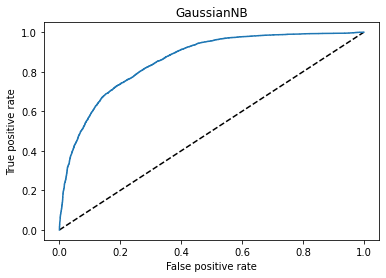

0.768046994050035

In [135]:
# Checking roc_auc_score for GaussianNB

y_pred_prob = GB.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.show()
auc_score = roc_auc_score(y2_test,GB.predict(x2_test))
auc_score

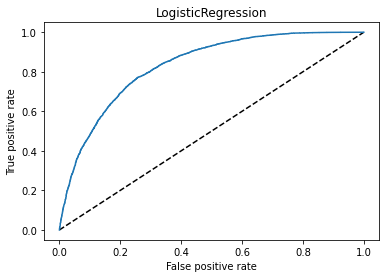

0.7565002925830764

In [136]:
# Checking roc_auc_score for LogisticRegression

y_pred_prob = LR.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()
auc_score = roc_auc_score(y2_test,LR.predict(x2_test))
auc_score

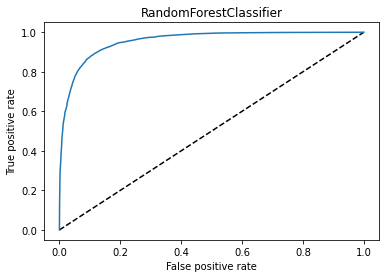

0.8879066551461153

In [137]:
# Checking roc_auc_score for RandomForestClassifier

y_pred_prob = RFC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,RFC.predict(x2_test))
auc_score

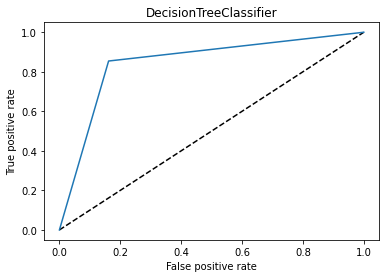

0.8464228524711523

In [138]:
# Checking roc_auc_score for DecisionTreeClassifier

y_pred_prob = DTC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,DTC.predict(x2_test))
auc_score

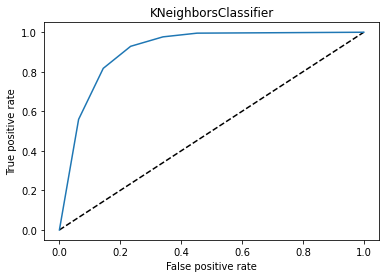

0.8474237139881815

In [139]:
# Checking roc_auc_score for KNeighborsClassifier

y_pred_prob = KNC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,KNC.predict(x2_test))
auc_score

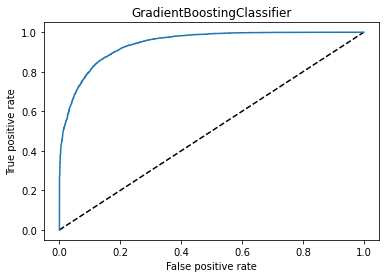

0.8604162192638536

In [140]:
# Checking roc_auc_score for GradientBoostingClassifier

y_pred_prob = GBC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,GBC.predict(x2_test))
auc_score

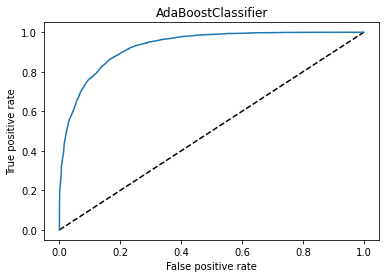

0.8485466325447685

In [141]:
# Checking roc_auc_score for AdaBoostClassifier

y_pred_prob = ABC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,ABC.predict(x2_test))
auc_score

In [142]:
# Checking roc_auc_score for BaggingClassifier

y_pred_prob = BC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BaggingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('BaggingClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,BC.predict(x2_test))
auc_score

0.8750314479476178

### Observations:
    
Based on Model Evaluation RandomForestClassifier is performing well with accuracy score of 88% with Cross validation score of 88% and AUC_ROC_Curve 88%, which is good compared with other Models

Proceeding with Hyper Parameter Tuning to enhance the Model

## Hyper Parameter Tuning

In [144]:
grid_params={'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],
            'max_depth':[50,100,150],'min_samples_split':[2,4,5],'min_samples_leaf': [1,2]}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [50, 100, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 150, 200]})
Best Score 0.8793538206267307
Best Params {'criterion': 'entropy', 'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Final Model

In [145]:
Final_Model = RandomForestClassifier(n_estimators =200, criterion = 'entropy',max_depth=150,min_samples_split=2,
                                     min_samples_leaf=1)
                                       
Final_Model.fit(x2_train,y2_train)
pred = Final_Model.predict(x2_test)
print(Final_Model.score(x2_train,y2_train))
cr22 = cross_val_score(Final_Model,x2,y2,cv=5)

print(accuracy_score(y2_test,pred)*100)
print('CV score of RandomForestClassifier:',cr22.mean()*100)
print(confusion_matrix(y2_test,pred))
print(classification_report(y2_test,pred))

1.0
88.83774453394706
CV score of RandomForestClassifier: 88.31417364466562
[[6063  868]
 [ 684 6289]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      6931
           1       0.88      0.90      0.89      6973

    accuracy                           0.89     13904
   macro avg       0.89      0.89      0.89     13904
weighted avg       0.89      0.89      0.89     13904



## AUC_ROC_CURVE - Final Model

In [146]:
# Checking roc_auc_score for Final Model

y_pred_prob = Final_Model.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Final Model - RandomForestClassifier ')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Final Model - RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,Final_Model.predict(x2_test))
auc_score

0.8883364515227365

### Observations:

## Saving the Final model

In [147]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,"Census_Income_Pred.pkl")

['Census_Income_Pred.pkl']

## Predicting the Model

In [148]:
# Loading the saved model

Model=joblib.load("Census_Income_Pred.pkl")

#Prediction
prediction = Model.predict(x2_test)
prediction

array([1, 1, 1, ..., 0, 0, 0])

In [162]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x2_test)[:],y2_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0              1         1
1              1         1
2              1         0
3              0         0
4              1         1
5              1         1
6              1         0
7              0         0
8              1         1
9              1         1
10             0         0
11             0         0
12             0         0
13             0         0
14             0         0
15             0         0
16             0         0
17             1         1
18             1         1
19             1         0
20             0         0
21             0         0
22             1         1
23             0         0
24             0         0
25             0         1
26             0         0
27             1         1
28             1         1
29             1         1
30             1         1
31             1         1
32             1         1
33             0         0
34             0         0
35             0         0
36             1         1
37             0         1
38             0         0
39             1         1
40             0         0
41             0         1
42             1         1
43             0         0
44             1         1
45             1         1
46             0         1
47             1         1
48             1         1
49             0         0
50             1         1
51             0         0
52             0         1
53             0         0
54             1         1
55             1         1
56             0         0
57             0         0
58             1         1
59             1         1
60             0         0
61             0         0
62             1         1
63             1         1
64             0         0
65             1         1
66             1         1
67             0         0
68             1         1
69             0         0
70             0         0
71             1         0
72             0         1
73             1         0
74             1         1
75             1         1
76             0         0
77             0         0
78             1         1
79             1         1
80             0         0
81             1         0
82             0         0
83             1         1
84             0         0
85             1         1
86             1         1
87             0         0
88             1         1
89             1         1
90             1         0
91             0         0
92             1         1
93             0         1
94             1         1
95             1         1
96             0         0
97             1         1
98             0         0
99             1         1
100            1         1
101            1         1
102            1         1
103            0         0
104            0         0
105            1         1
106            0         0
107            1         1
108            1         0
109            0         0
110            1         1
111            0         0
112            1         1
113            1         1
114            0         0
115            1         1
116            1         1
117            1         1
118            0         1
119            1         1
120            1         1
121            1         1
122            0         0
123            1         0
124            0         0
125            1         1
126            0         0
127            1         1
128            0         0
129            0         0
130            1         1
131            1         1
132            1         1
133            1         1
134            1         1
135            1         1
136            0         0
137            1         1
138            0         0
139            0         0
140            0         0
141            0         0
142            1         1
143            1         1
144            0         0
145            1         1
146            0         0
147        

# Conclusion

Dataset contains 32560 rows and 15 columns

It has been observed that there were unknown values found in the dataset which has been modified by replace method

Based on visualization and data analysis we can observe below points

In workclass, people who are employed in private sectors are the high compared with other sectors 

If we categorize by Education, people with HS-grad has the maximum count followed by some college and bachelors

If we divide people based on their martial status, married-civ-spouse is maximum followed by never married and divorced

By occupation of the people, prof-speciality tops the chart following craft repair, Exec managerial, Adm-clerical, sales and other service, lowest count is in Armed forces

Based on relationship, husband count is maximum and If we categorize by race, ‘White’ has the maximum count of 27815 and ‘Black’ with 3124 in second with huge margin

By sex male count is higher than female and more than 90% of the people have their native_country as United states

If we look into education_num, maximum people are in 9 which denotes HS-grad followed by some college and bachelors

Almost 90% of the people are with 0 capital gain and capital loss 

Male count is higher than female in the category of income above 50k

Female count is higher than male in the category of income below 50k

People with income above 50k works for 40+ hours a week and people who earns below 50k work for below 40hours a week
As this shows people income increases when their working hours increase

Specifically people in the age of 78, 83, 65, 69, 71, 74 and 79 has the highest Capital_Gain

When we compare Age Vs Capital_Loss, people in the age group from mid 60's to 80's have the maximum loss followed by people from mid 30's to 60's 

Finally when we comes to Model evaluation, RandomForestClassifier is performing well with accuracy score of 89% 
with Cross validation score of 88% and AUC_ROC_Curve 88%, which is good compared with other Models

Random Forest Classifier Model which was built on the base of the Census Income dataset is predicting good as we can see, Original Vs Predicted value is same 

Thank you for Providing the opportunity to work on the Census Income dataset.